In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

# Code credit to Can Güney Aksakalli: Network Centrality Measures and Their Visualization

First, we are defining a simple method to draw the graph and the centrality metrics of nodes with a heat map.

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

Zachary’s Karate Club graph is defined as the example graph G. It is basically a social network of members of an university karate club, where undirected edges connects people who interact outside the club.

In [3]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=675)

We also need a directed graph to demonstrate some other centrality measures. Here we are defining the toy directed graph DiG which is given as an example in wikipedia.

In [4]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

# Degree Centrality

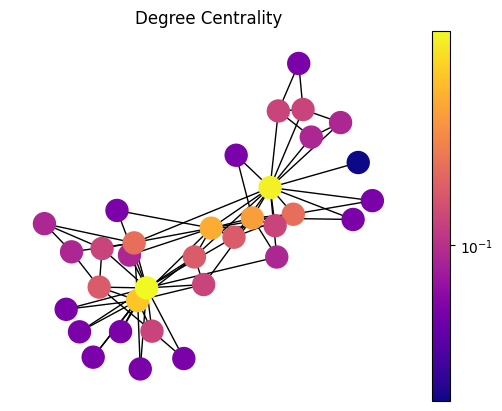

In [5]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

Degree of a node is basically number of edges that it has. The basic intuition is that, nodes with more connections are more influential and important in a network. In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.

For directed graphs, in-degree, number of incoming points, is considered as importance factor for nodes.

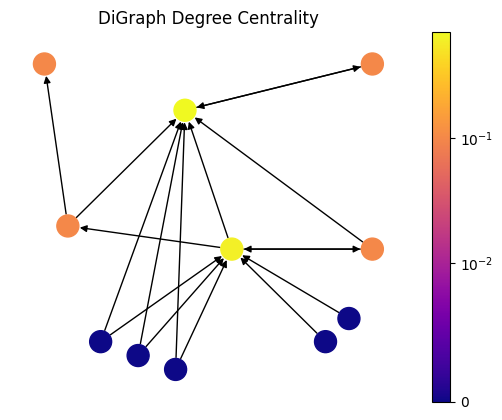

In [6]:
draw(DiG, dpos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')

# Closeness Centrality

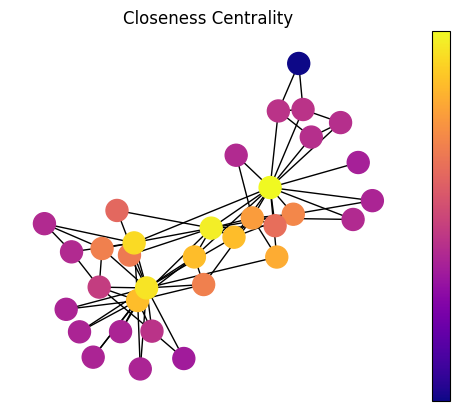

In [7]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

Closeness Centrality is a self-explanatory measure where each node’s importance is determined by closeness to all other nodes. Let $d_{ij}$
 be the length of the shortest path between nodes $i$ and $j$, the average distance $l_{i}$ is such as:

$l_{i} = \frac{1}{n} \sum_{j} d_{ij}$

Since we are looking for the closer node, the Closeness Centrality $C_{i}$is inverse proportional to average length $l_{i}$, so:

$C_{i}= \frac{1}{l_{i}}= \frac{n}{l_{i}\sum_{j} d_{ij}}$

# Betweenness Centrality

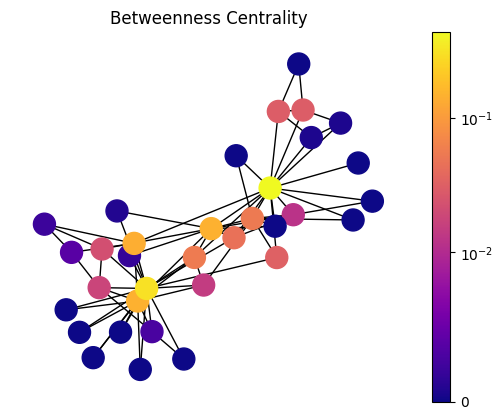

In [8]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

Betweenness Centrality is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node. For starting node $s$, destination node $t$ and the input node $i$ that holds $s \neq t \neq i$, let $n_{st}^{i}$ be 1 if node $i$ lies on the shortest path between $s$ and $t$; and 0 if not. So the betweenness centrality is defined as:

$x_{i}=\sum_{st}n_{st}^{i}$

However, there can be more than one shortest path between $s$ and $t$ and that will count for centrality measure more than once. Thus, we need to divide the contribution to $g_{st}$, total number of shortest paths between $s$ and $t$.

$x_{i}=\sum_{st}\frac{n_{st}^{i}}{g_{st}}$

# Eigenvector Centrality

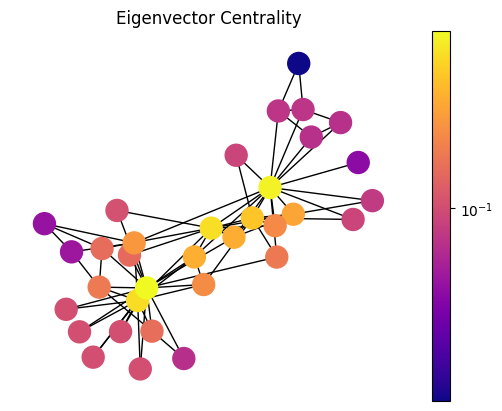

In [9]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

Eigenvector centrality is a basic extension of degree centrality, which defines centrality of a node as proportional to its neighbors’ importance. When we sum up all connections of a node, not all neighbors are equally important. Let’s consider two nodes in a friend network with same degree, the one who is connected to more central nodes should be more central.

First, we define an initial guess for the centrality of nodes in a graph as $x_{i}=1$
. Now we are going to iterate for the new centrality value $x'_{i}$ for node $i$ as following:

$x'_{i}=\sum_{j}A_{ij}x_{j}$

Here $A_{ij}$ is an element of the adjacency matrix, where it gives 1 or 0 for whether an edge exists between nodes $i$ and $j$. it can also be written in matrix notation as $x'=Ax$. We iterate over t steps to find the vector $x(t)$ as:

$x(t)=A^{t}x(0)$

The drawing also shows, the nodes which have the same number of connections are not necessarily in the same heat map color. The one that is connected to more central nodes are more hot in this visualization.